In [1]:
datadir='/data'
prefix='/opt/callc/rt'

import pandas as pd
from os import chdir
from main import make_preds
from moldescriptors import get_features

In [2]:
valp = pd.read_excel('validation.xls',sheet_name='Validation dataset POS')
valp = valp.drop(valp[valp['RT'].isna()].index)[['Name','SMILES','RT']]
valp.RT *= 60

In [3]:
valp

,Name,SMILES,RT
0,Benfuracarb,CCOC(=O)CCN(SN(C)C(=O)OC1=CC=CC2=C1OC(C)(C)C2)...,814.2
1,Ethiofencarb,CCSCC1=C(OC(=O)NC)C=CC=C1,580.2
2,Chlortoluron,CN(C)C(=O)NC1=CC(Cl)=C(C)C=C1,588.0
3,Diflubenzuron,FC1=CC=CC(F)=C1C(=O)NC(=O)NC1=CC=C(Cl)C=C1,734.4
4,Diuron,CN(C)C(=O)NC1=CC(Cl)=C(Cl)C=C1,616.8
5,Fenobucarb,CCC(C)C1=CC=CC=C1OC(=O)NC,663.0
6,Flufenoxuron,FC1=CC=CC(F)=C1C(=O)NC(=O)NC1=C(F)C=C(OC2=C(Cl...,857.4
7,Hexaflumuron,FC(F)C(F)(F)OC1=C(Cl)C=C(NC(=O)NC(=O)C2=C(F)C=...,802.8
8,Indoxacarb,COC(=O)N(C(=O)N1CO[C@]2(CC3=C(C=CC(Cl)=C3)C2=N...,798.6
9,Isoprocarb,CNC(=O)OC1=C(C=CC=C1)C(C)C,607.8


In [4]:
trainpos = pd.read_csv('train_positive.tsv',sep='\t')
trainpos

,SMILES,Theor. m/z ESI+,RT,Diversity Selection Rank,Unnamed: 4
0,FC1=CC=CC(F)=C1C(=O)NC(=O)NC1=CC(Cl)=C(OC2=NC=...,539.97024,876.6,1,NaN
1,CO[C@@H]1C[C@@H](C[C@H]2CC[C@H](C)[C@@H](O2)[C...,725.48344,921.6,2,NaN
2,NC1=NC(Cl)=NC(N)=N1,146.02280,162.6,3,NaN
3,CCOP(S)(=O)OCC,171.02393,227.4,4,NaN
4,CCN(CC)C(=O)C1=CC=CC(C)=C1,192.13829,621.0,5,NaN
5,COC1=CC=C(C(=O)C2=CC=CC=C2)C(O)=C1,229.08592,730.8,6,NaN
6,CN(C)C(=O)NC1CCCCCCC1,199.18049,627.0,7,NaN
7,OC(=NCCC1=C(Cl)C=C(C=N1)C(F)(F)F)C1=CC=CC=C1C(...,397.05368,715.8,8,NaN
8,COP(N)(=O)SC,142.00861,174.0,9,NaN
9,[H][C@@]12C[C@H](C[C@@]1([H])[C@]1([H])C=C3C(=...,732.46813,755.4,10,NaN


In [5]:
with open('feats_lib.csv','w'): pass
get_features(infile_name='train_positive.tsv',outfile_name='features_pos.csv',id_index=3,mol_index=0,time_index=2)
pd.read_csv('features_pos.csv')

,IDENTIFIER,time,fr_tetrazole,MaxEStateIndex,fr_hdrzone,fr_amidine,Kappa1,MinAbsEStateIndex,MolWt,PEOE_VSA7,...,fr_NH1,SMR_VSA10,fr_alkyl_halide,EState_VSA2,fr_Ar_OH,Chi3v,fr_oxazole,Chi0v,fr_epoxide,fr_HOCCN
0,1,876.6,0,13.664605,0,0,25.472589,0.061916,540.659,30.331835,...,2,52.428500,3,21.482165,0,4.838804,0,18.504913,0,0
1,2,921.6,0,11.822856,0,0,39.792704,0.007267,724.973,83.470681,...,0,5.969305,0,84.339167,0,14.423771,0,32.838949,0,0
2,3,162.6,0,5.328025,0,0,6.026582,0.013889,145.553,11.600940,...,0,23.497618,0,17.180265,0,0.811745,0,5.130235,0,0
3,4,227.4,0,10.833642,0,0,9.500000,0.361883,170.170,13.847474,...,0,19.046256,0,0.000000,0,2.446283,0,7.322240,0,0
4,5,621.0,0,11.885093,0,0,10.768802,0.123796,191.274,32.903946,...,0,5.907180,0,5.907180,0,2.315678,0,9.079077,0,0
5,6,730.8,0,12.065942,0,0,11.203023,0.071108,228.247,12.132734,...,0,5.783245,0,17.096208,1,2.485503,0,9.382512,0,0
6,7,627.0,0,11.424038,0,0,11.345358,0.051457,198.310,12.841643,...,1,6.031115,0,6.031115,0,2.838952,0,9.382560,0,0
7,8,715.8,0,12.897455,0,0,20.027204,0.060302,396.718,18.199101,...,0,17.498685,6,23.682139,0,3.655510,0,13.621636,0,0
8,9,174.0,0,10.469907,0,0,7.500000,1.038194,141.132,6.255769,...,0,18.103144,0,0.000000,0,3.500979,0,5.960233,0,0
9,10,755.4,0,14.651509,0,0,39.977125,0.037985,731.968,108.554120,...,0,11.752550,0,96.780694,0,13.252681,0,32.940663,0,0


In [6]:
chdir(datadir)
valp.to_csv('validation_pos.tsv',sep='\t')
get_features(infile_name='validation_pos.tsv',outfile_name='val_features_pos.csv',id_index=0,mol_index=2)
pd.read_csv('val_features_pos.csv')

,IDENTIFIER,fr_tetrazole,MaxEStateIndex,fr_hdrzone,fr_amidine,Kappa1,MinAbsEStateIndex,MolWt,PEOE_VSA7,NumSaturatedHeterocycles,...,fr_NH1,SMR_VSA10,fr_alkyl_halide,EState_VSA2,fr_Ar_OH,Chi3v,fr_oxazole,Chi0v,fr_epoxide,fr_HOCCN
0,0,0,12.581380,0,0,22.360071,0.124798,410.536,40.685053,0,...,0,24.196506,0,24.033019,0,5.362295,0,18.298242,0,0
1,1,0,11.067093,0,0,11.912254,0.426900,225.313,11.819221,0,...,1,17.855125,0,0.000000,0,2.764454,0,9.764856,0,0
2,2,0,11.280185,0,0,10.858247,0.162111,212.680,24.619923,0,...,1,23.319441,0,6.031115,0,2.236485,0,9.221406,0,0
3,3,0,13.375404,0,0,14.929139,0.373801,310.687,36.398202,0,...,2,29.226620,0,0.000000,0,2.770953,0,11.247771,0,0
4,4,0,11.247199,0,0,11.146511,0.205195,233.098,18.199101,0,...,1,34.920381,0,6.031115,0,2.316082,0,9.355300,0,0
5,5,0,11.111026,0,0,11.564129,0.394311,207.273,23.968546,0,...,1,6.093240,0,0.000000,0,2.469080,0,9.410355,0,0
6,6,0,14.313556,0,0,23.923162,0.162388,488.771,42.464569,0,...,2,29.226620,3,16.521657,0,4.388022,0,16.822578,0,0
7,7,0,13.524548,0,0,22.627260,0.271279,461.145,24.265468,0,...,2,40.827560,4,5.687386,0,3.726724,0,15.224420,0,0
8,8,0,13.326621,1,0,25.258829,0.053387,527.839,41.961654,0,...,0,41.093671,3,17.819893,0,5.646285,0,19.422831,0,0
9,9,0,11.022697,0,0,10.570064,0.343385,193.246,17.547725,0,...,1,6.093240,0,0.000000,0,1.947799,0,8.703248,0,0


In [7]:
chdir(prefix)
make_preds(reference_infile=datadir + '/features_pos.csv',pred_infile=datadir + '/val_features_pos.csv',outfile=datadir+'/pred_pos')
chdir(datadir)

Total number of train molecules with tR: 175
Training Layer 1 LASSO


/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Training Layer 1 AdaBoost


/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Training Layer 1 XGBoost


/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Training Layer 1 SVR


/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Training Layer 1 BRR


/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Applying model: mods_l1/FEM_orbitrap_urine_adaboost42.pickle
Unable to load: <_io.BufferedReader name='mods_l1/FEM_orbitrap_urine_adaboost42.pickle'>
Could not execute: mods_l1/FEM_orbitrap_urine_adaboost42.pickle local variable 'model' referenced before assignment
Applying model: mods_l1/PFR-TK72_bayesianregr42.pickle
Applying model: mods_l1/FEM_orbitrap_plasma_SVM42.pickle
Applying model: mods_l1/1290SQ_lasso42.pickle
Applying model: mods_l1/MPI_Symmetry_lasso42.pickle
Applying model: mods_l1/MTBLS19_bayesianregr42.pickle
Applying model: mods_l1/MTBLS87_SVM42.pickle
Applying model: mods_l1/MTBLS36_lasso42.pickle
Applying model: mods_l1/MTBLS17_lasso42.pickle
Applying model: mods_l1/MTBLS20_lasso42.pickle
Applying model: mods_l1/Ken_lasso42.pickle
Applying model: mods_l1/Krauss_adaboost42.pickle
Unable to load: <_io.BufferedReader name='mods_l1/Krauss_adaboost42.pickle'>
Applying model: mods_l1/UniToyama_Atlantis_lasso42.pickle
Applying model: mods_l1/MTBLS38_SVM42.pickle
Applying mod

/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator ARDRegression from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVR from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator Lasso from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator Lasso from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results.

Applying model: mods_l1/Toshimitsu_SVM42.pickle
Applying model: mods_l1/LIFE_new_SVM42.pickle
Applying model: mods_l1/MTBLS52_lasso42.pickle
Applying model: mods_l1/MTBLS20_SVM42.pickle
Applying model: mods_l1/1290SQ_SVM42.pickle
Applying model: mods_l1/FEM_lipids_SVM42.pickle
Applying model: mods_l1/Mark_bayesianregr42.pickle
Applying model: mods_l1/Ken_SVM42.pickle
Applying model: mods_l1/MTBLS20_bayesianregr42.pickle
Applying model: mods_l1/Eawag_XBridgeC18_adaboost42.pickle
Unable to load: <_io.BufferedReader name='mods_l1/Eawag_XBridgeC18_adaboost42.pickle'>
Applying model: mods_l1/MTBLS20_adaboost42.pickle
Unable to load: <_io.BufferedReader name='mods_l1/MTBLS20_adaboost42.pickle'>
Applying model: mods_l1/Vogler_bayesianregr42.pickle
Applying model: mods_l1/MTBLS17_adaboost42.pickle
Unable to load: <_io.BufferedReader name='mods_l1/MTBLS17_adaboost42.pickle'>
Applying model: mods_l1/MTBLS36_adaboost42.pickle
Unable to load: <_io.BufferedReader name='mods_l1/MTBLS36_adaboost42.pi

/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator Lasso from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVR from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVR from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVR from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your

Applying Layer 3...
Layer 3 fitted coefficient (MTBLS20_bayesianregr): 0.029
Layer 3 fitted coefficient (Eawag_XBridgeC18_adaboos): 0.029
Layer 3 fitted coefficient (MTBLS20_adaboos): 0.029
Layer 3 fitted coefficient (UniToyama_Atlantis_bayesianregr): 0.017
Layer 3 fitted coefficient (c18pest_100_1_brr): 0.176
Layer 3 fitted coefficient (c18pest_60_1_xgb): 0.078
Layer 3 fitted coefficient (c18pest_100_0_SV): 0.049
Layer 3 fitted coefficient (Toshimitsu_bayesianregr): 0.073
Layer 3 fitted coefficient (Tohge_bayesianregr): 0.062
Layer 3 fitted coefficient (Taguchi_bayesianregr): 0.012
Layer 3 fitted coefficient (RIKEN_SV): 0.033
Layer 3 fitted coefficient (FEM_long_SV): 0.099
Layer 3 fitted coefficient (LIFE_new_bayesianregr): 0.074
Layer 3 fitted coefficient (LIFE_old_bayesianregr): 0.022
Layer 3 fitted coefficient (MASSTRPLAN_adaboos): 0.128
Layer 3 fitted coefficient (MASSTRPLAN_xgb): 0.101
Layer 3 fitted coefficient (MASSTRPLAN_brr): 0.057
Layer 3 sum coefficients: 1.069
Done, predic

/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:
chdir(datadir)
pred_pos = pd.read_csv('pred_pos.csv')
pred_pos

,identifiers,predictions
0,0,775.291677
1,1,617.748910
2,2,568.869324
3,3,681.682357
4,4,622.057221
5,5,671.336690
6,6,817.475040
7,7,796.184678
8,8,765.207737
9,9,618.878794


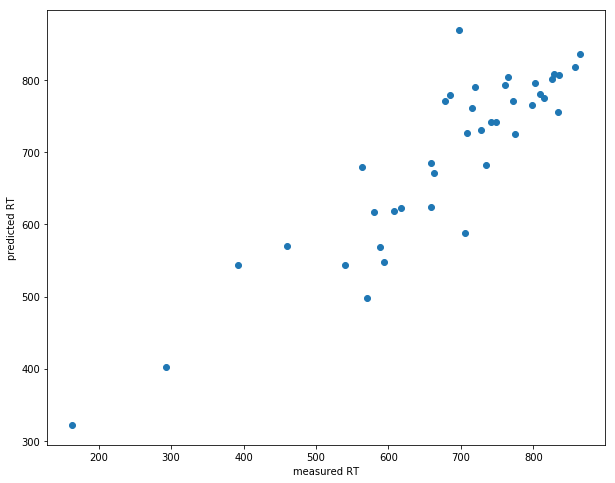

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(valp.RT.values,pred_pos.predictions.values)
plt.xlabel('measured RT')
plt.ylabel('predicted RT')
plt.show()

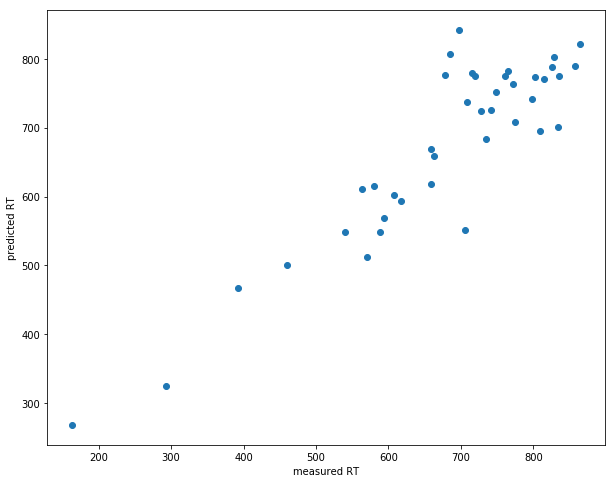

In [12]:
'''
plt.figure(figsize=(10,8))
plt.scatter(valp.RT.values,pred_pos.predictions.values)
plt.xlabel('measured RT')
plt.ylabel('predicted RT')
plt.show()

# Dont run, copy of prediction without c18pest